# ANALIZA PODATKOV SPLETNE STRANI "ARCHIVE OF OUR OWN"

## Archive Of Our Own

Archive Of Our Own, bolje poznana pod imenom ***AO3*** je neprofitna, nekomercialna spletna stran, ki služi kot arhiv *fanficov*. To so (ponavadi) krajše fiktivne zgodbe, ki so jih napisali ljubitelji neke knjige, filma, glasbene skupine... Zgodbe vsebujejo like, dogodke ali kraje, vzete iz izbranega področja, v angleščini imenovanega *fandom*. Angleška beseda je nastala po vzorcu besede *kingdom*, v slovenščini pa prevoda nimamo. Vseeno lahko besedo *fandom* razlagamo kot subkulturo ali skupnost, katere člani so ljubitelji iste stvari.

Na spletni strani lahko uporabniki zastonj pišejo in objavljajo svoje zgodbe, prav tako pa lahko berejo, komentirajo, všečkajo... ostala objavljena dela. Ta so najprej razvrščena po različnih kategorijah kot so Knjige in literatura, Filmi in serije, Videoigre, Znane osebnosti..., nato pa še podrobneje na specifične knjige, filme, igre... Za vse zgodbe, ki ne ustrezajo nobenemu specifičnemu področju, pa je namenjena kategorija "Uncategorised fandoms", kjer so večinoma zbrana čisto originalna dela.

## Kratek opis naloge

Najprej bomo analizirali število del in specifičnih *fandomov* glede na širše kategorije. Pri tem izpustimo prej omenjeno kategorijo "Uncategorised Fandoms", saj ne vsebuje podatkov o dejanskih področij ampak zgolj originalna dela. Nato si bomo podrobneje pogledali 1.000 najbolj priljubljenih del na temo knjžne serije Harry Potter, kar je trenutno tudi najbolj priljubljen *fandom* v kategoriji Knjige in literatura.

## Priprava na analizo
Preden začnemo, si pripravimo okolje.

In [320]:
import pandas as pd
pd.set_option('display.max_rows', 10)
import matplotlib.pyplot as plt


Uvozimo podatke o *fandomih* in delih o Harryju Potterju.

In [321]:
pot_dela='podatki/dela.csv'
pot_fandomi='podatki/fandomi.csv'
dela=pd.read_csv(pot_dela)
fandomi=pd.read_csv(pot_fandomi)

## Analiza *fandomov*

### Priljubljeni *fandomi* in kategorije
Poglejmo si najprej 10 najbolj priljubljenih *fandomov*. Dober kriterij za to je število del, ki so bila objavljena za to področje.

In [322]:
fandomi.sort_values("število del", ascending=False, inplace=True)
fandomi=fandomi.reset_index(drop=True)
fandomi.index=fandomi.index+1
naj_10=fandomi.head(10)
naj_10

,vrsta fandoma,fandom,število del
1,Celebrities & Real People,Real Person Fiction,764303
2,Music & Bands,K-pop,709325
3,TV Shows,Marvel,647349
4,Cartoons & Comics & Graphic Novels,Marvel,647349
5,Movies,Marvel,647349
6,Movies,Harry Potter - J. K. Rowling,537058
7,Video Games,Harry Potter - J. K. Rowling,537058
8,Books & Literature,Harry Potter - J. K. Rowling,537058
9,Movies,Marvel Cinematic Universe,520890
10,Cartoons & Comics & Graphic Novels,Marvel Cinematic Universe,520890


Nekateri *fandomi* so zaradi same vsebine lahko razvrščeni pod več kategorij. Zgoraj vidimo, da se recimo Marvel pojavi kar trikrat, saj spada pod filme, serije in tudi stripe. Da bi tako širokemu pojmu določili le eno izmed teh kategorij, bi bilo ne samo krivično, temveč bi tudi v nadaljevnaju vodilo do morda ne najbolj zanesljivih rezultatov.

Odstranimo *vrsto fandoma*, da dobimo boljšo predstavo o večkratnem ponavljanju *fandomov*.

In [323]:
brez_vrste=fandomi[['fandom','število del']].copy()
brez_vrste.head(10)

,fandom,število del
1,Real Person Fiction,764303
2,K-pop,709325
3,Marvel,647349
4,Marvel,647349
5,Marvel,647349
6,Harry Potter - J. K. Rowling,537058
7,Harry Potter - J. K. Rowling,537058
8,Harry Potter - J. K. Rowling,537058
9,Marvel Cinematic Universe,520890
10,Marvel Cinematic Universe,520890


Vidimo, da se vsaj največja področja očitno pojavljajo v več kategorijah. To ima seveda smisel, saj jim ravno to zagotavlja večjo publiko in posledično več objvaljenih del. Kljub temu si želimo videti 10 različnih najpopularnejših področij. Da ne bomo filtrirali vseh vrstic (zanima nas le prvih nekaj podatkov), naredimo funkcijo za prvih 30 rezultatov.

In [324]:
# pripravimo tabelo za določanje kriterija
brez_vrste=brez_vrste.head(30).copy()
# Funkcija bo za nov stolpec vrnila vrednost 'odstrani',
# če se je ime fandoma že prej pojavilo v tabeli,
# sicer v stolpec vrne 'pusti'.
imena=set()
def odstrani(i):
    if i in imena:
        return 'odstrani'
    imena.add(i)
    return 'pusti'

brez_vrste['kriterij']=brez_vrste.apply(lambda x: odstrani(x['fandom']), axis=1)

In [325]:
naj_10_res=brez_vrste[brez_vrste['kriterij']=='pusti']
del naj_10_res['kriterij']
naj_10_res=naj_10_res.head(10)
naj_10_res.reset_index(drop = True, inplace = True)
naj_10_res.index = naj_10_res.index + 1
naj_10_res


,fandom,število del
1,Real Person Fiction,764303
2,K-pop,709325
3,Marvel,647349
4,Harry Potter - J. K. Rowling,537058
5,Marvel Cinematic Universe,520890
6,Original Work,361570
7,DCU,344912
8,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,331989
9,Video Blogging RPF,290455
10,Supernatural (TV 2005),262938


Izkaže se, da sta med vodilnimi področji *Real Person Fiction* (liki v zgodbah so resnični ljudje) in *K-pop*, obe s kar več kot 700.000 del. Če dobro pogledamo, opazimo, da se *Marvel* zopet pojavi dvakrat, tokrat pod različnima naslovoma na 3. in 5. mestu. Število del pod imenoma je različno, iz česar lahko sklepamo, da gre za različna dela. Žal ponavljanje področij pod podobnimi imeni na tej spletni strani ni redkost, a se v večini ne pojavlja pri dovolj znanih *fandomih*. Zaradi tega bomo obe pojavitvi *Marvel*-a tokrat obravnavali kot različni, z malo razmisleka pa lahko opazimo, da imata skupaj več kot milijon del, kar naredi *Marvel* najbolj priljubljen *fandom*.

V naprej se je dobro zavedati, da različne kategorije niso nujno disjunktne množice fandomov. To bo močno pomagalo pri razumevanju naslednjih grafov, v katerih so prikazani deleži, ki jih posamezne kategorije zastopajo.

Deleže lahko izračunamo na dva načina: štejemo lahko število fandomov ali število vseh del znotraj kategorije. 

In [326]:
# priljubljenost kategorije glede na število del
vrste=fandomi[['vrsta fandoma','število del']].copy()
vrste=vrste.groupby('vrsta fandoma').sum('število del')
vrste.sort_values('število del', ascending= False, inplace=True)
vrste=vrste.reset_index()
vrste.index=vrste.index +1
vsa_dela= vrste['število del'].sum()
vrste['delež (v %)']=((vrste['število del']/vsa_dela)*100).round(1)

In [327]:
vrste

,vrsta fandoma,število del,delež (v %)
1,TV Shows,6189778,17.4
2,Movies,5881969,16.5
3,Cartoons & Comics & Graphic Novels,4997354,14.0
4,Video Games,4604194,12.9
5,Books & Literature,3654480,10.3
6,Anime & Manga,2958121,8.3
7,Other Media,2599326,7.3
8,Celebrities & Real People,2270017,6.4
9,Music & Bands,2224604,6.3
10,Theater,190181,0.5


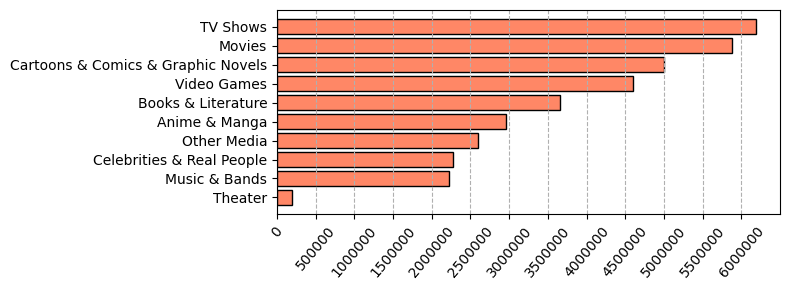

In [328]:
graf1=vrste.sort_values('število del')
plt.figure(figsize=(8,3))
plt.barh(graf1['vrsta fandoma'], graf1['število del'], color='#ff8766', edgecolor='black')
leto=[i for i in range(0,6500000) if i%500000 ==0]
plt.xticks(leto,leto, rotation=50)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()

In [329]:
#priljubljenost kategorije glede na število fandomov
st_fandomi=fandomi['vrsta fandoma'].value_counts()
st_fandomi=pd.DataFrame(st_fandomi)
st_fandomi.sort_values('count', inplace=True, ascending=False )
st_fandomi=st_fandomi.reset_index()
st_fandomi.rename(columns={'vrsta fandoma':'kategorija', 'count': 'število fandomov'}, inplace=True)
st_fandomi.index=st_fandomi.index+1
st_fandomi

,kategorija,število fandomov
1,Movies,12593
2,Books & Literature,12485
3,TV Shows,10394
4,Video Games,7333
5,Music & Bands,7067
6,Cartoons & Comics & Graphic Novels,5506
7,Anime & Manga,4746
8,Other Media,4459
9,Celebrities & Real People,2290
10,Theater,1551


Mislili bi si, da bo priljubljenost posamezne kategorije približno enaka, ne glede na to katerega izmed kriterijev izberemo, a se izkaže, da se vrstni red priljubljenosti dosti razlikuje. Za boljšo primerjavo si drug ob drugem poglejmo tortna diagrama, ki predstavljata deleže arhiva, ki ji glede na izbran kriterij zapolnjuje posamezna kategorija.

<Axes: >

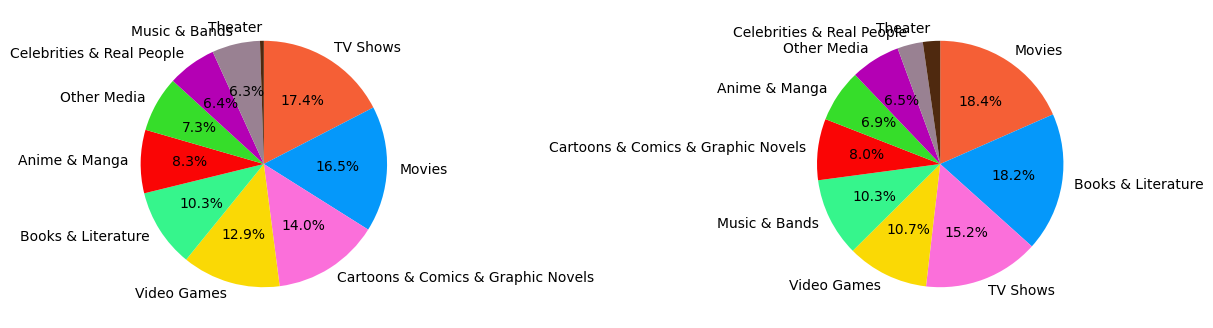

In [330]:
figure, (a1,a2)=plt.subplots(1,2, figsize=(16,4))
vrste.plot(kind='pie', y='delež (v %)', ylabel='',labels=vrste['vrsta fandoma'],
           legend=None,
           autopct=lambda p: f'{p:.1f}%' if p > 5 else '', #zaradi prekrivanja števil
           ax=a1, 
           startangle=90,
           counterclock=False,
           colors=['#f55f36','#0598fa',"#fb6fda",'#fad905','#36f58c','#fa0505',"#36dd2a","#b400b4",'#998192','#4f290f'],)
st_fandomi.plot(kind='pie', y='število fandomov',ylabel='', labels=st_fandomi['kategorija'], 
            legend=None,
            autopct=lambda p: f'{p:.1f}%' if p > 5 else '', #zaradi prekrivanja števil
            ax=a2,
            startangle=90,
            counterclock=False,
            colors=['#f55f36','#0598fa',"#fb6fda",'#fad905','#36f58c','#fa0505',"#36dd2a","#b400b4",'#998192','#4f290f'],)


Zanimiva opazka pri tem je, da so deleži na obeh grafih zelo podobnni za vseh 10 kategorij. Glavna razlika med grafoma je v resnici razporeditev posameznih kategorij glede na izbran kriterij.

Ob upoštevanju obeh krtierijev lahko kljub razlikam naredimo nekaj dobrih zaključkov. Ne glede na kriterij je najmanj zastopano področe *Theater* oziroma gledališče. Razlog najverjetneje leži v dejstvu, da je pisanje in objavljanje takšnih krajših del dosti bolj priljubljeno med mlajšimi generacijami. Poleg tega so vse ostal naštete kategorije medijev danes bolj dostopne kot gledališče.

Med najbolj priljubljeni kategoriji zagotovo spadata *Movies* (filmi) in *TV Shows* (televizijske oddaje). Ti dve kategoriji se v obeh primerih pojavita med tremi najboljšimi, vsaka enkrat zasede prvo mesto.

Še ena kategorija, ki ima dokaj zasidrano mesto na lestvici priljubljenih je *Video Games* (videoigre). Ta je v obeh primerih pristala na 4. mestu, prav tako z dovolj podobnim deležem.

### Število del

Zanima nas količina del napisanih za različne fandome, ker pa je lahko to karkoli med 1 in več kot 700.000, je dobro število del zaokrožiti vsaj na 100.

In [331]:
def zaokroži_100(x):
    return round(x, -2)
dela_zaokroženo=fandomi['število del'].apply(zaokroži_100)
fandomi['dela zaokroženo']=dela_zaokroženo
dela_100=fandomi['dela zaokroženo'].value_counts().to_frame()
dela_100.rename(columns={'count': 'št. fandomov'}, inplace=True)
dela_100.reset_index(inplace=True)

Rezultate bi radi predstavili na grafu, kjer so na *x*-osi predstavljena števila del, na *y*-osi pa število *fandomov*, za katere je napisano tako število del.

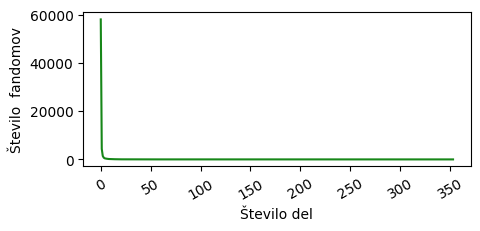

In [332]:
plt.figure(figsize=(5,2))
plt.plot(dela_100['št. fandomov'], color='#178719')
plt.ylabel('Število  fandomov')
plt.xlabel('Število del')
plt.xticks(rotation=30)
plt.show()

Opazimo, da je *fandomov* z manj kot 50 deli občutno več kot ostalih, zaradi česar je zgornji graf dokaj nekoristen. Da bodo podatki bolj reprezentativni, si poglejmo zgolj *fandome* z 500 ali manj deli, pri čemer tokrat število del zaokrožimo na 10.

In [333]:

manjši_fandomi=fandomi[fandomi['število del']<=500].copy()
def zaokroži_10(x):
    return round(x,-1)
dela_10=manjši_fandomi['število del'].apply(zaokroži_10)
manjši_fandomi['dela zaokroženo']=dela_10
manjši_fandomi.sort_values('število del', inplace=True, ascending=False)
graf_10=manjši_fandomi['dela zaokroženo'].value_counts().to_frame()
graf_10

,count
dela zaokroženo,
0,40601
10,9485
20,4167
30,1868
40,1490
...,...
450,38
440,37
490,30


In [334]:
samo_1=len(fandomi[fandomi['število del']==1])
vseh=len(fandomi)
print(f'Število "fandomov", za katera je napisano zgolj eno delo je {samo_1}, vseh "fandomov" pa je {vseh}.')

Število "fandomov", za katera je napisano zgolj eno delo je 21063, vseh "fandomov" pa je 68424.


Področij, katerih število del se zaokroži na 0, je kljub temu še vedno veliko več kot ostalih. To je posledica ogromnega deleža podorčij, za katera je bilo napisano samo eno delo. Za še boljšo predstavo količine del napisanih za različna področja bomo zato prikazali tudi graf brez tistih podorčij, za katera je napisanih manj kot 5 del. 

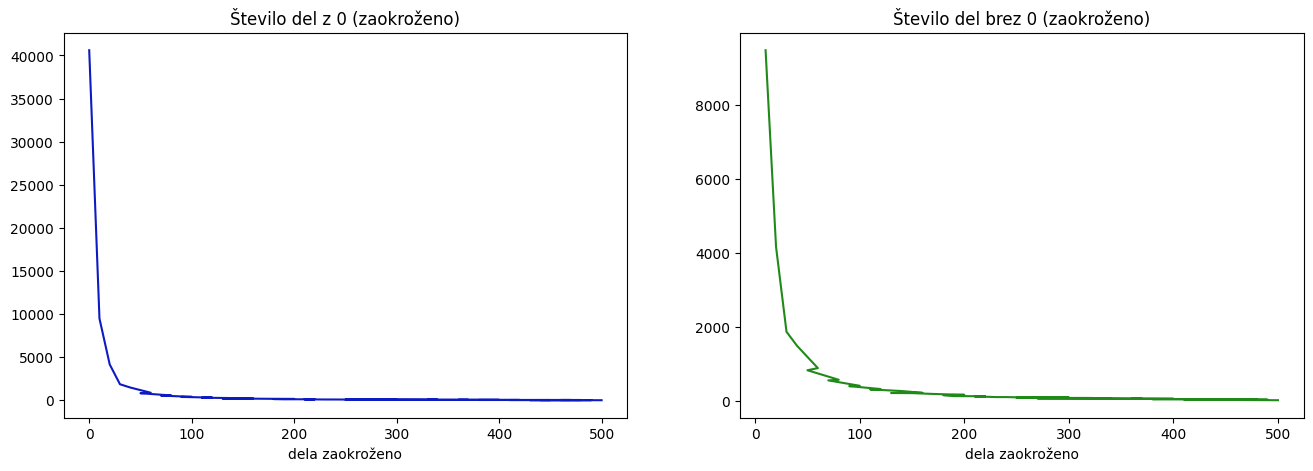

In [335]:
brez_0=graf_10[graf_10.index>0].copy() # pripravimo tabelo kjer izpustimo prvo vrstico
fig, (a1,a2)=plt.subplots(1,2,figsize=(16,5))
graf_10.plot(kind='line',y='count', legend=False, ax=a1, color='#0e1ac2')
brez_0.plot(kind='line',y='count',legend=False, ax=a2, color='#208a19')
a1.set_title('Število del z 0 (zaokroženo)')
a2.set_title('Število del brez 0 (zaokroženo)')
plt.show()


Rezultat je tukaj precej očiten. Za večino področij na spletni strani je napisanih manj kot 5 del, področja, za katere je napisanih več kot 100 del pa so v primerjavi s prejšnjimi prav redka. Del razloga za to se lahko skriva v tem, da je včasih eno področje objavljeno pod več različnimi imeni, ki se med seboj razlikujejo le v specifikah. Če se na primer spomnimo na začetek analize, kjer smo predstavili 10 najbolj popularnih podorčij, se je *Marvel* pojavil dvakrat: enkrat pod tem imenom in drugič pod *Marvel Cinematic Universe*. Žal spletna stran ni dovolj stroga do uporabnikov, da bi preprečila ustvarjanje tako podobnih imen *fandomov*, zaradi česar so dela predvsem manj znanih področij razpršena pod več zelo podobnih imen.

## Analiza del na temo *Harry Potter*

S spletne strani smo pobrali 1.000 najbolj priljubljenih del o Harryju Potterju, pri čemer smo priljubljenost upoštevali gelede na število *kudosov*, kar je na tej spletni strani ekvivalentno všečkom. Še dve kategoriji, ki ju je vredno komentriati pred začetkom same analize, sta *hits* in *bookmarks*. *Hits* predstavlja število kolikokrat so uporabniki odprli določeno delo - in ga posledično najverjetneje brali, *bookmarks* pa predstavlja število ljudi, ki so to delo na neki točki shranili, najverjetneje za branje pozneje. Smiselno je omeniti še, da kategoriji *mesec* in *leto* predstvaljata okviren datum, ko je avtor delo nazadnje posodobil.

Sedaj ko vse kategorije malo bolje razumemo, se lotimo same analize.

In [336]:
dela.sort_values('kudos', inplace=True, ascending=False )
dela=dela.reset_index(drop=True)
dela.index=dela.index+1
dela

,naslov,mesec,leto,jezik,število besed,komentarji,kudos,bookmarks,hits,napisana poglavja,vsa poglavja,avtor
1,All the Young Dudes,11,2018,English,526969,44487,276722,49336,18157885,188,188,MsKingBean89
2,Draco Malfoy and the Mortifying Ordeal of Bein...,4,2022,English,199548,12685,89006,27901,4707503,36,36,isthisselfcare
3,Evitative,2,2020,English,222453,8403,80862,21865,2693248,29,29,Vichan
4,Lily's Boy,1,2022,English,746386,12760,77795,22793,4530812,109,109,SomewheresSword
5,Then Comes a Mist and a Weeping Rain,8,2011,English,21139,1313,76338,14321,928311,1,1,Faith Wood (faithwood)
...,...,...,...,...,...,...,...,...,...,...,...,...
996,A Beautiful Lie,11,2021,English,65840,1669,8114,2512,185548,14,ni podatka,Panis_fluvium
997,blood will tell but often it tells too much,8,2016,English,2489,278,8110,2468,62813,1,1,elumish
998,White Lies,12,2017,English,171013,512,8110,2461,271745,32,32,cassisluna
999,Finest in Fairford,8,2012,English,4997,180,8110,1049,68414,1,1,bluepeony


### Jezik

In [337]:
jeziki=dela['jezik'].value_counts().to_frame()
jeziki

,count
jezik,
English,999
Español,1


In [338]:
dela[dela['jezik']=='Español']

,naslov,mesec,leto,jezik,število besed,komentarji,kudos,bookmarks,hits,napisana poglavja,vsa poglavja,avtor
765,Draco Malfoy y los héroes del Olimpo,8,2025,Español,905336,13141,9378,354,335876,104,ni podatka,Luka_sama


Kot vidimo je le eno delo v španščini, vsa ostala so v angleščini. Glede na to, da smo zajeli le 1.000 najbolj priljubljenih del, to ni tako presenetljivo. Vseh del na to temo je namreč več kot pol milijona, na sami spletni strani pa lahko brez dodatnega iskanja dostopamo le do 100.000 del. Poleg tega je Harry Potter vseeno serija zahodnega sveta in je bila tudi v originalu napisana v angleščini, prav tao so v angleščini bili vsi filimi. Glede na to, da so bila dela zajeta glede na priljubljenost, raznolikosti v jezikih res ni mogoče pričakovati.

### Čas nastanka

Sama knjižna serija o mladem čarovniku je bila končana leta 2007, z izjemo dodatne knjige, ki je naknadno izšla leta 2016. Tudi filmi so nastali zgodaj, začeli so se namreč že pred zaključkom knjižne serije, zadnji pa je izšel leta 2011. Kljub temu je Harry Potter ostal dovolj popularen, da so fiktivna dela na to temo nastajala (in še nastajajo) dolgo po tem. Poglejmo si kako se je število nastalih del spreminjalo zadnja leta.

In [339]:
leta=dela['leto'].value_counts().to_frame()
leta=leta.reset_index()

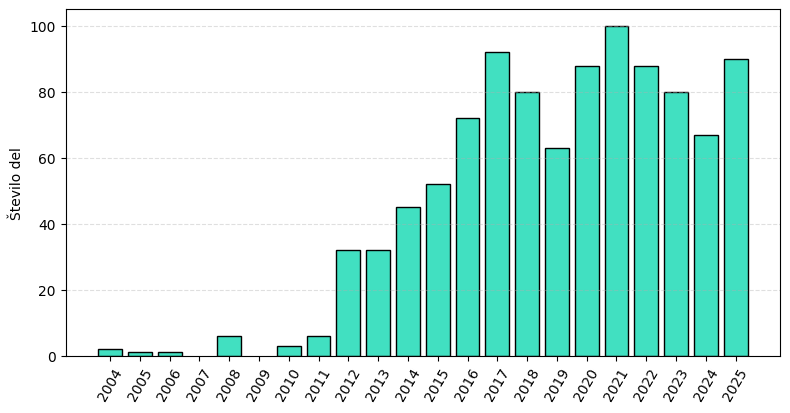

In [340]:
l1=leta.sort_values('leto', ascending=True)
plt.figure(figsize=(8,4))
plt.bar(l1['leto'],l1['count'], color='#41e0c1',edgecolor='black')
plt.ylabel('Število del')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
xl=[i for i in range(2004,2026)]
plt.xticks(xl,xl,rotation=60)
plt.show()

Na grafu lahko opazimo kar nekaj očitnejših skokov. Prvi je med letoma 2006 in 2008, torej ravno po zaključku knjižne serije. Drugi, večji skok je po letu 2011, torej ravno ob koncu izida vseh filmov. Takrat je zgodba o Harryju Potterju dosegla dosti večjo množico ljudi, poleg tega pa dodala vsem ljubiteljem še dodatno vizualno predstavo krajev, likov in dogodkov, iz česar so nato najverjenteje črpali ideje za svoja fiktivna dela. 

Tretji večji skok je viden med letoma 2019 in 2020. Glede na to, da sama zgodba v tem času ni doživela kakšnega mejnika, je to najverjetneje posledica pandemije. Ljudje smo takrat v večini imeli več prostega časa kot sicer, poleg tega pa se je na družabnem omrežju TikTok v tem času razvila podskupina imenovana *BookTok*. Večina članov skupine je brala predvsem fantazijske knjige, delila mnenja in predloge, tako za otroke kot za odrasle. *BookTok* je postal dovolj popularen, da je imel vidne posledice v svetu prodaje knjig in vse več ljudi je v branju knjig našlo svoj hobi. Glede na te podatke bi si upala ugibati, da je ta preskok posledica pandemije in nastanka *BookTok*-a in bi najverjetneje podobno sliko dobili tudi pri ostalih dovolj znanih knjigah.

Še zadnji presenetljiv podatek pa je za leto 2025, saj ga sploh še ni konec a je že na tretjem mestu po številu del. Ob tem se spomnimo, da datumi v resnici predstavlja zadnjo posodobitev oziroma objavo dela. To pomeni, da je najbrž dosti del, ki so bila nazadnje posodobljena letos, bilo v nastajanju že vsaj nekaj let prej in se bo število zadnjih posodobitev v letu 2025 s prihodom novega leta najverjetneje dosti zmanjšalo. Vseeno nam to da vedeti, da skoraj 20 let po izidu zadnje knjige fiktivna dela na temo te serije še vedno nastajajo in bodo najverjetneje nastajala še kar nekaj časa. 

Izvzemši podatke iz leta 2025, lahko vseeno opazimo trendno črto od leta 2021 naprej, ki je dovolj podobna tisti od 2016 naprej, do pandemije. Popularnost Harryja Potterja vseeno počasi zamira, najpopularnejša pa ostajajo dela iz preteklih let. 

V našo analizo časa dodajmo še mesece.

In [341]:
datum=dela[['mesec','leto']].copy()
# ustvarimo kriterij, ki enolično določi leto in mesecc
datum['skupaj']=datum['leto']*100+ datum['mesec']
st=datum['skupaj'].value_counts().to_frame()
st['leto']=st.index//100
st['mesec']=st.index%100

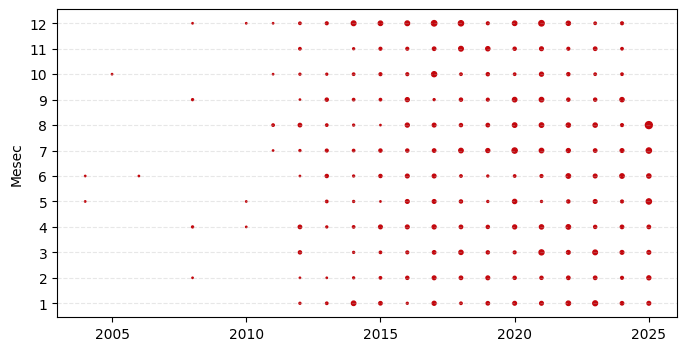

In [342]:
plt.figure(figsize=(8,4))
plt.scatter(st['leto'],st['mesec'], s=st['count'], color='#c4060c')
yl=[i for i in range(1,13)]
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylabel('Mesec')
plt.yticks(yl)
plt.show()

Vidimo lahko, da so dela nastajajo konstistentno že od leta 2014 vsak mesec. Opazen je tudi manjši porast del v decembru, za kar nekaj del tudi v poletnem času. Glede na to, da sta to tradicionalno meseca z največ počitnicami, dopusti ali praznik, ta podatek ni tako presenetljiv. Tudi na tem grafu vidimo navidezno porast del ne samo v tem letu, temveč celo v tem mesecu. Podobno kot na prejšnjem grafu je to najverjetneje posledica zadnjih posodobitev, zato podatki za preteklih nekaj mesecov niso najbolj informativni.

### Avtorji

Preverimo, kolikokrat se pojavijo avtorji, ki so lastniki več kot enega izmed prvih 1.000 del. 

In [343]:
avtorji=dela.value_counts('avtor').to_frame()
avtorji=avtorji[avtorji['count']>1].copy()
avtorji=avtorji.rename(columns={'count':'št. del'}) 
avtorji

,št. del
avtor,
Lomonaaeren,52
orphan_account,25
Faith Wood (faithwood),17
dirgewithoutmusic,14
DebsTheSlytherinSnapeFan,13
...,...
Miss_Lv,2
worksofstone,2
Becstar7,2


Avtor(ica) *Lomonaaeren* se poajvi občutno večkrat kot katerakoli druga oseba. Že od drugouvrščenega *orphan_acoount*-a ima več kot dvakrat toliko del, med najboljšimi 1.000 deli jih je napisal(a) kar 5 %. Oglejmo si dela te osebe še malo natančneje.

In [344]:
Lomonaaeren=dela[dela['avtor']=='Lomonaaeren'].copy()
Lomonaaeren

,naslov,mesec,leto,jezik,število besed,komentarji,kudos,bookmarks,hits,napisana poglavja,vsa poglavja,avtor
101,Pythonicus,12,2020,English,44388,1253,24171,2485,205288,7,7,Lomonaaeren
111,Princeps,11,2019,English,11322,461,23561,3454,304636,3,3,Lomonaaeren
119,A Brother to Basilisks,8,2020,English,613877,7030,22701,6189,1164872,155,155,Lomonaaeren
127,Forget-Me-Not,7,2020,English,50776,849,21687,6199,272726,7,7,Lomonaaeren
141,The Onyx in Radiance,3,2023,English,116679,3093,20841,4669,545843,36,36,Lomonaaeren
...,...,...,...,...,...,...,...,...,...,...,...,...
863,The Willing,6,2024,English,60397,1253,8802,2195,171112,20,20,Lomonaaeren
874,Bonded Consort,7,2017,English,89650,1205,8744,2238,171146,29,29,Lomonaaeren
965,Casualties of Politics,4,2025,English,185341,2067,8287,2706,244003,29,105,Lomonaaeren
975,How Like Hatred,11,2019,English,9117,285,8195,912,122079,3,3,Lomonaaeren


Kot lahko vidimo, se dela te osebe raztezajo po celotni lestvici najboljših 1.000, kar je zelo pohavlno v *fandomu*, kjer je napisanih več kot pol milijona fiktivnih zgodb.

In [345]:
M=Lomonaaeren.max(axis=0)['leto']
m=Lomonaaeren.min(axis=0)['leto']
print(f'Avtor(ica) Lomonaaeren je svoje najstarejše delo končal(a) leta {m}, svoje najnovejše delo pa je nazadnje posodobil(a) leta {M}.')

Avtor(ica) Lomonaaeren je svoje najstarejše delo končal(a) leta 2012, svoje najnovejše delo pa je nazadnje posodobil(a) leta 2025.


Na podlagi teh podatkov lahko definitvno rečemo, da je oseba za tem uporabniškim imenom zelo zagreta za serijo Harry Potter. Izjemno priljubljene zgodbe na to temo piše vsaj trinajst let in glede na to, da je zadnja posodobitev bila še letos, se po trinajstih letih najbrž še ne bo ustavila.

Posebej si oglejmo še avtorje, ki so želeli ostati anonimni. Ti imajo v stolpcu *avtor* zapisano vrenost *'ni podatka'*.

In [346]:
dela[dela['avtor']=='ni podatka']

,naslov,mesec,leto,jezik,število besed,komentarji,kudos,bookmarks,hits,napisana poglavja,vsa poglavja,avtor
434,Old Haunts (Are For Forgotten Ghosts),4,2021,English,40000,417,12335,2754,141449,4,4,ni podatka
704,the best laid plans,8,2022,English,39181,851,9739,2838,122313,7,ni podatka,ni podatka
760,"Five Times They Weren't, and One Time They Tot...",11,2016,English,3466,180,9399,1623,79085,6,6,ni podatka


Anonimni so želeli ostati le trije avtorji, pri analizi števila avtorjev, ki imajo več kot eno delo na lestvici najboljših 1.000, pa jih bomo izpustili, saj najverjetneje ne gre za isto osebo.

In [347]:
avtorji=avtorji[avtorji.index!='ni podatka'].copy()
avtorji['na 5']=avtorji['št. del']- avtorji['št. del']%5
d5=avtorji.value_counts('na 5').to_frame()

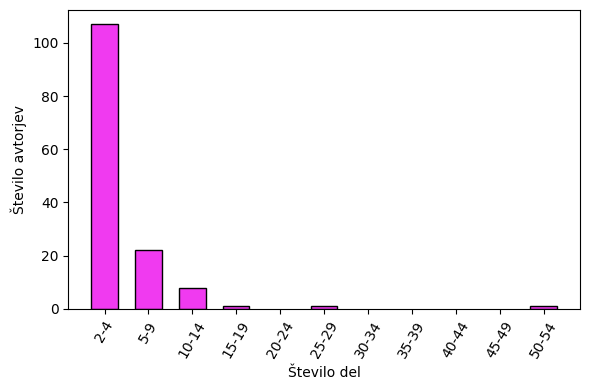

In [348]:
plt.figure(figsize=(6,4))
plt.bar(d5.index,d5['count'], width=3, color='#f03af0', edgecolor='black')
plt.xlabel('Število del')
plt.ylabel('Število avtorjev')
imena=['2-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54']
pozicije=[i for i in range(0,51) if i%5==0]
plt.xticks(pozicije, imena, rotation=60)
plt.tight_layout()
plt.show()

In [349]:
po_1= 1000 - avtorji['št. del'].sum()
več=len(avtorji)
print(f"""Avtorjev, ki imajo med prvih 1000 del le eno delo, je {po_1}, tistih, ki jih iamjo več pa {več}.
    SKupaj je za prvih 1000 del o Harryju Potterju odgovornih {po_1+več} avtorjev.""")

Avtorjev, ki imajo med prvih 1000 del le eno delo, je 401, tistih, ki jih iamjo več pa 140.
    SKupaj je za prvih 1000 del o Harryju Potterju odgovornih 541 avtorjev.


Kot vse kaže, imeti več kot eno delo med prvimi 1.000, ni takšna redkost med avtorji teh del. Kakor hitro mejo iz enega dela dvignemo na pet, pa nam ostane le peščica avtorjev.

### Število besed in poglavij

Poglejmo si, koliko del je končanih (število napisanih pogalvij je enako številu vseh poglavij) in povprečno število besed na poglavje.

In [350]:
# Dodajmo stolpec, ki določi status dela (končano / nekončano)
def status(x,y):
    if x=='ni podatka':
        return 'nekončano'
    x=int(x)
    if x==y:
        return 'končano'
    return 'nekončano'
dela['status']=dela.apply(lambda x: status(x['vsa poglavja'],x['napisana poglavja']), axis=1 )
stat=dela.value_counts('status').to_frame()

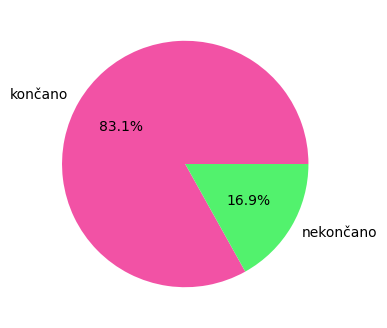

In [351]:
plt.figure(figsize=(4,4))
plt.pie(stat['count'], labels=stat.index, autopct='%1.1f%%', colors=['#f252a5','#52f26d'])
plt.show()

Glede na starost same serije in prejšnjih rezultatov o najbolj produktivnih letih, ta rezultat ni tako presenetljiv. Sicer je res, da nekateri avtorji napovejo več poglavij in jih nato nikoli ne končajo, ali pa poglavij sploh ne napovejo in nato čez čas izgubijo motivacijo ter delo na njih opustijo. Takšni primeri so tukaj bili prešteti pod nekončana dela. Po drugi strani pa drugi avtorji sproti povečujejo število vseh poglavij na toliko, kolikor so jih tudi napisali. Ti so v tem primeru bili prešteti pod končana dela, tako da so napake pri štetju najverjetneje na obeh straneh in mamo kljub vsemu dovolj natančen rezultat.

Poglejmo si kako povprečno število besed na poglavje vpliva na priljubljenost dela.

In [352]:
dela['povpr. besed']=dela.apply(lambda x: round((x['število besed']/x['napisana poglavja']),0), axis=1)

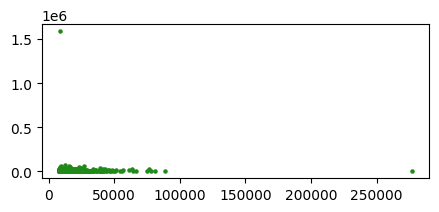

In [353]:
plt.figure(figsize=(5,2))
plt.scatter(dela['kudos'],dela['povpr. besed'],s=5, color='#208a19')
plt.show()

In [354]:
dela[dela['kudos']>200000]

,naslov,mesec,leto,jezik,število besed,komentarji,kudos,bookmarks,hits,napisana poglavja,vsa poglavja,avtor,status,povpr. besed
1,All the Young Dudes,11,2018,English,526969,44487,276722,49336,18157885,188,188,MsKingBean89,končano,2803.0


Delo, ki ima občutno več *kudosov* kot katerokoli drugo, je fiktivna zgdoba **All the Young Dudes**. Ta je med ljubitelji zgodbe o Harryju Potterju postala tako znana, da si jo je mogoče dati natisniti in zvezati, zanjo pa obstajajo tudi "originalne" platnice. Da bo naš graf bolj informativen, bomo to delo izpustili.

In [355]:
dela[dela['povpr. besed']>200000]

,naslov,mesec,leto,jezik,število besed,komentarji,kudos,bookmarks,hits,napisana poglavja,vsa poglavja,avtor,status,povpr. besed
837,The Breeding Ground,2,2025,English,3176981,859,8952,1384,4156135,2,2,megamatt09,končano,1588490.0


In [356]:
# pripravimo manjšo tabelo besed in kudosov
bk=dela[['kudos','povpr. besed']].copy()
bk.drop(837, axis='index', inplace=True)
bk.drop(1, axis='index', inplace=True)

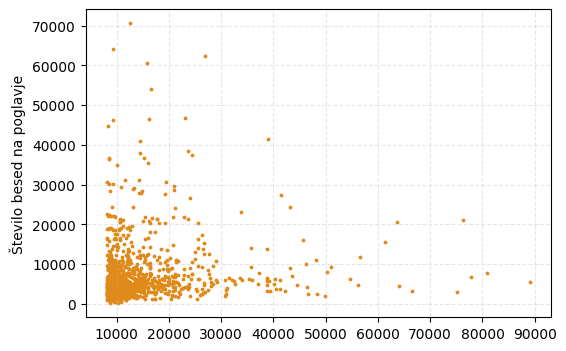

In [357]:
plt.figure(figsize=(6,4))
plt.scatter(bk['kudos'], bk['povpr. besed'], s=3, color='#e08a19')
plt.ylabel('Število besed na poglavje')
plt.grid(axis='both', linestyle='--', alpha=0.3)
plt.show()

Opazimo, da ima večina del v povprečju do 10.000 besed na poglavje. Dela z občutno več besedami so večinoma tudi manj priljubljena.

Sedaj naredimo podobno primerjavo, tokrat s številom poglavij (upoštevamo že napisana poglavja).

In [358]:
# pripravimo manjšo tabelo poglavij in kudosov
pk=dela[['naslov','napisana poglavja','kudos']].copy()
pk.drop(1,axis='index',inplace=True)
pk[pk['napisana poglavja']>200]

,naslov,napisana poglavja,kudos
378,Certain Dark Things,306,13262
683,For Want of an Outfit,271,9932
880,if wishes were thestrals (muggles would ride),435,8694


Znova zaradi močnega odstopanja odstranimo kritična dela iz baze podatkov.

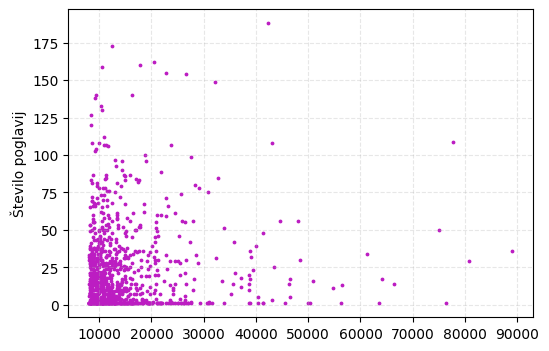

In [359]:
pk=pk[pk['napisana poglavja']<=200]
plt.figure(figsize=(6,4))
plt.scatter(pk['kudos'],pk['napisana poglavja'], s=3, color='#bc1dc2')
plt.grid(axis='both',linestyle='--', alpha=0.3)
plt.ylabel('Število poglavij')
plt.show()

Velika večina fiktivnih zgodb ima manj kot 50 poglavij, ne izgleda pa, da bi to vplivalo na priljubljenost dela. Med bolj priljubljenimi se v dokaj enaki meri znajdejo tako dela z manj, kot tudi z več kot 50 poglavij.

### Komentarji, obiskanost in shranjenost

Poglejmo si še, kako se interkacije bralcev z delom ujema z njegovo uspešnostjo. Pri tem pod interakcije štejemo komentarje, shranjevanje del (*bookmarks*) in obiskovanje dela (*hits*), uspešnost pa merimo z všečki (*kudos*).

In [365]:
manjša=dela[['naslov','komentarji','bookmarks','hits','kudos']].copy()
ko=manjša.sort_values('komentarji',ascending=False).head(5)
bo=manjša.sort_values('bookmarks',ascending=False).head(5)
hi=manjša.sort_values('hits',ascending=False).head(5)
display(ko[['naslov','komentarji']], bo[['naslov','bookmarks']], hi[['naslov','hits']])

,naslov,komentarji
1,All the Young Dudes,44487
123,snipers solve 99% of all problems,19268
65,Holly Potter and the Midlife Crisis,17762
54,The Contract,16555
10,survival is a talent,15601


,naslov,bookmarks
1,All the Young Dudes,49336
2,Draco Malfoy and the Mortifying Ordeal of Bein...,27901
4,Lily's Boy,22793
3,Evitative,21865
8,Running on Air,21195


,naslov,hits
1,All the Young Dudes,18157885
2,Draco Malfoy and the Mortifying Ordeal of Bein...,4707503
4,Lily's Boy,4530812
837,The Breeding Ground,4156135
46,Measure Of A Man,3788689


Razen izjeme, ki se pojavlja že ves čas, torej dela **All the Young Dudes**, se na prvi pogled vse tri tabele, ki predstavljajo drugačen način interakcije z objavljenim delom, precej razlikujejo. Za boljšo predstavo bomo iz podatkov zopet izvzeli najbolj priljubljeno iz med del, nato pa na grafih predstavili število interakcij v odvisnosti od popularnosti dela.

In [366]:
manjša.drop(1,axis='index', inplace=True)

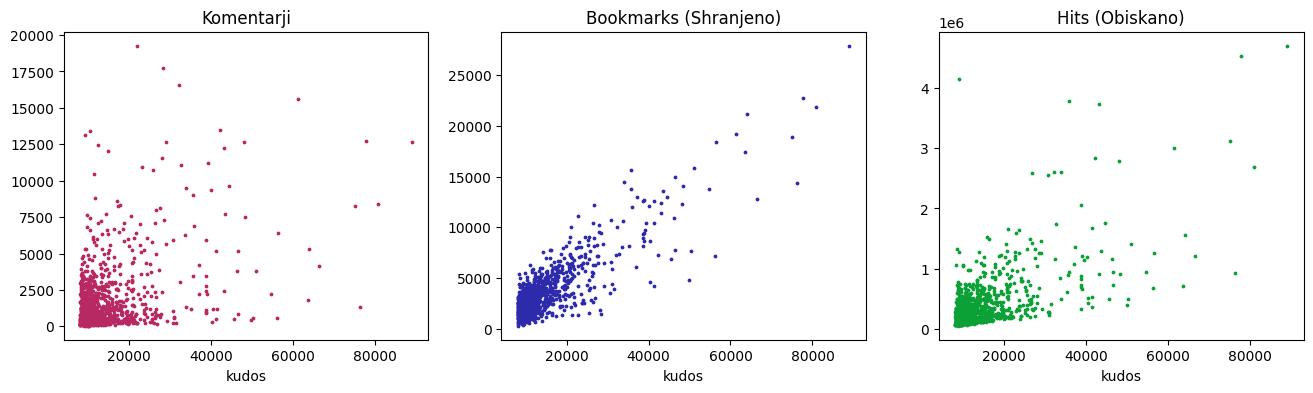

In [367]:
figure, (a1,a2,a3)=plt.subplots(1,3,figsize=(16,4))
manjša.plot(kind='scatter',x='kudos',y='komentarji',s=3, ax=a1,title='Komentarji',ylabel='', color='#b82862')
manjša.plot(kind='scatter',x='kudos',y='bookmarks',s=3, ax=a2, title='Bookmarks (Shranjeno)', ylabel='', color='#2d2bab')
manjša.plot(kind='scatter',x='kudos',y='hits',s=3, ax=a3, title='Hits (Obiskano)', ylabel='',color='#0ba136')
plt.show()

Trendu naraščanja interakcij skupaj s številom *kudosov* najbolj sledi interakcija *bookmarks*. Povedali smo že, da to predstavlja število ljudi, ki so si delo tako ali drugače označili in shranili za poznejše branje.

Čeprav je graf s števili obiskov dela (*hits*) malo bolj urejen kot graf števil komentarjev, sta oba precej razmetana. Sploh pri komentarjih se ne zdi, kot da bi sama priljubljenost kakorkoli vplivala na to število.

Poleg interakcij pa je na teh grafnih dobro vidna zgostitev vseh pik v bližini koordinatnega izhodišča. To je posledica razporejenosti števila *kudosov*.

In [368]:
kd=dela[['naslov','kudos']].copy()
kd.drop(1, axis='index',inplace=True) # odstranimo All the Young Dudes
kd['zaokroži']=kd.apply(lambda x: round(x['kudos'],-3), axis=1)
kd=kd.value_counts('zaokroži').to_frame()


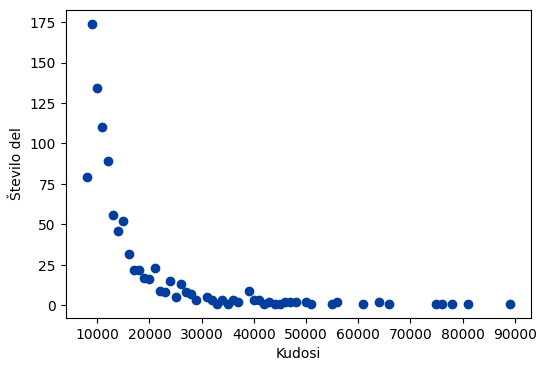

In [369]:
plt.figure(figsize=(6,4))
plt.scatter(kd.index, kd['count'], color='#023e9e')
plt.xlabel('Kudosi')
plt.ylabel('Število del')
plt.show()

Kot lahko vidimo, so dela z več deset tisoč všečki (*kudosi*) dokaj redka, zaradi česar so podatki na zgornjih grafih bili zgoščeni predvsem v bližini koordinatnega izhodišča.

## Zaključne misli

V projektni nalogi se je pokazalo nekaj ključnih ugotovitev o nastajanju krajših fiktivnih del s strani ljubiteljev raznih področij. Rezultati prvega dela analize nakazujejo na prevladovanje medijev, katerim smo dandanes kot družba bolj izpostavljeni - to so filmi in televizijske oddaje. Po drugi strani so kategorije, kot je na primer gledališče, dosti manj zastopane. Izkazalo se je tudi, da je navsezadnnje ogromno različnih področij, o katerih ljudje pišejo krajša dela in se tako povezujejo po celem svetu. Če ne kaj drugega, ta rezultat izkazuje kreativnost današnje družbe.

Analiza fiktivnih del o Harryju Potterju je najprej pokazala doakj usklajeno rast popularnosti glede na mejnike same serije. Edina izjema je vnovični skok v popularnosti v času pandemije, ki je najverjetneje posledica takratnih okoliščin. Razen tega izgleda, da serija počasi a vztrajno izgublja popularnost med psici fiktivnih del, a glede na trenutno količino zabeleženih posodobitev v zadnjem letu, bo ta knjižna serija ostala na vrhu še kar nekaj časa.

Kot vse kaže, pisanje krajših fiktivnih del oziroma *fanficov* še dolgo ne bo izumrlo. 